TRANSFORMACIONES REALIZADAS EN NUESTROS DATOS

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Como comentamos en el documento, eliminamos todas las columnas que pertenecen a las cuotas de las casas de apuestas, puesto que no aportan valor añadido a nuestro objetivo y podemos prescindir de ellas

In [18]:
games = pd.read_csv('../data/games.csv')
games = games.drop(columns=['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'])
games.head(5)

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,0.3158,1,0
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,0.2926,0,0
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,0.2675,0,1
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,0.1521,3,0
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,0.6380,0,1


También hemos optado por cambiar la columna 'date' de tipo object a tipo date.

In [19]:
games['date'] = pd.to_datetime(games['date'])
games.dtypes

gameID                        int64
leagueID                      int64
season                        int64
date                 datetime64[ns]
homeTeamID                    int64
awayTeamID                    int64
homeGoals                     int64
awayGoals                     int64
homeProbability             float64
drawProbability             float64
awayProbability             float64
homeGoalsHalfTime             int64
awayGoalsHalfTime             int64
dtype: object

In [20]:
teamstats = pd.read_csv('../data/teamstats.csv')
teamstats = teamstats.drop(columns=['ppda'])
teamstats.head(5)

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,7,8,1.0,0,D


Como en el caso de "games", hemos optado por cambiar la columna 'date' a tipo date en vez de dejarla como tipo object.

In [21]:
teamstats['date'] = pd.to_datetime(teamstats['date'])
teamstats.dtypes

gameID                    int64
teamID                    int64
season                    int64
date             datetime64[ns]
location                 object
goals                     int64
xGoals                  float64
shots                     int64
shotsOnTarget             int64
deep                      int64
fouls                     int64
corners                   int64
yellowCards             float64
redCards                  int64
result                   object
dtype: object

In [22]:
teams = pd.read_csv('../data/teams.csv')
teams.head(5)

,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion


NO SÉ SI ES NECESARIO HACER ESTAS UNIONES DE TABLAS REALMENTE, PERO IGUAL ESTÁ MAL HECHA (SEGURAMENTE)

In [23]:
new_table = pd.merge(games, teamstats, on="gameID", how="inner")
new_table = pd.merge(new_table, teams, on = 'teamID', how = 'inner')
new_table.to_csv("new_table.csv", index=False)

In [24]:
new_table = new_table.drop(columns = ['date_y', 'season_y'])
new_table.head()

,gameID,leagueID,season_x,date_x,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,xGoals,shots,shotsOnTarget,deep,fouls,corners,yellowCards,redCards,result,name
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,0.627539,9,1,4,12,1,2.0,0,W,Manchester United
1,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,0.674600,9,4,10,12,2,3.0,0,L,Tottenham
2,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,0.876106,11,2,11,13,6,3.0,0,L,Bournemouth
3,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,0.782253,7,3,2,13,3,4.0,0,W,Aston Villa
4,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,0.604226,10,5,5,7,8,1.0,0,D,Everton


In [25]:
new_table.columns.tolist()

['gameID',
 'leagueID',
 'season_x',
 'date_x',
 'homeTeamID',
 'awayTeamID',
 'homeGoals',
 'awayGoals',
 'homeProbability',
 'drawProbability',
 'awayProbability',
 'homeGoalsHalfTime',
 'awayGoalsHalfTime',
 'teamID',
 'location',
 'goals',
 'xGoals',
 'shots',
 'shotsOnTarget',
 'deep',
 'fouls',
 'corners',
 'yellowCards',
 'redCards',
 'result',
 'name']

In [26]:
new_table['location'].unique()

array(['h', 'a'], dtype=object)

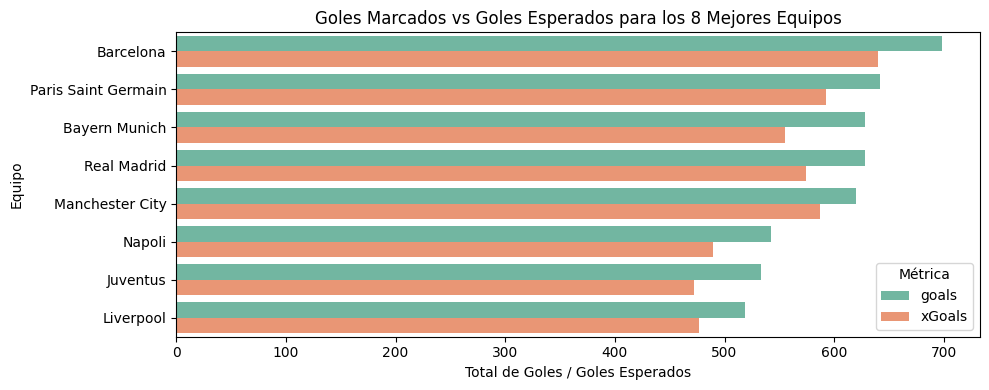

In [27]:
team_goals = teamstats.groupby('teamID').agg({'goals': 'sum', 'xGoals': 'sum'}).reset_index()

team_names = pd.merge(teams, teamstats, on="teamID", how="inner")
team_names = team_names[['teamID', 'name']].drop_duplicates(subset=['teamID'])
team_goals = team_goals.merge(team_names, on='teamID')

top_teams = team_goals.sort_values(by='goals', ascending=False).head(8)

top_teams_melted = top_teams.melt(id_vars=["teamID", "name"], value_vars=["goals", "xGoals"], var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 4))
sns.barplot(x="Value", y="name", hue="Metric", data=top_teams_melted, palette="Set2", dodge=True)
plt.title("Goles Marcados vs Goles Esperados para los 8 Mejores Equipos")
plt.xlabel("Total de Goles / Goles Esperados")
plt.ylabel("Equipo")
plt.legend(title="Métrica",  loc='lower right')  
plt.tight_layout()
plt.show()

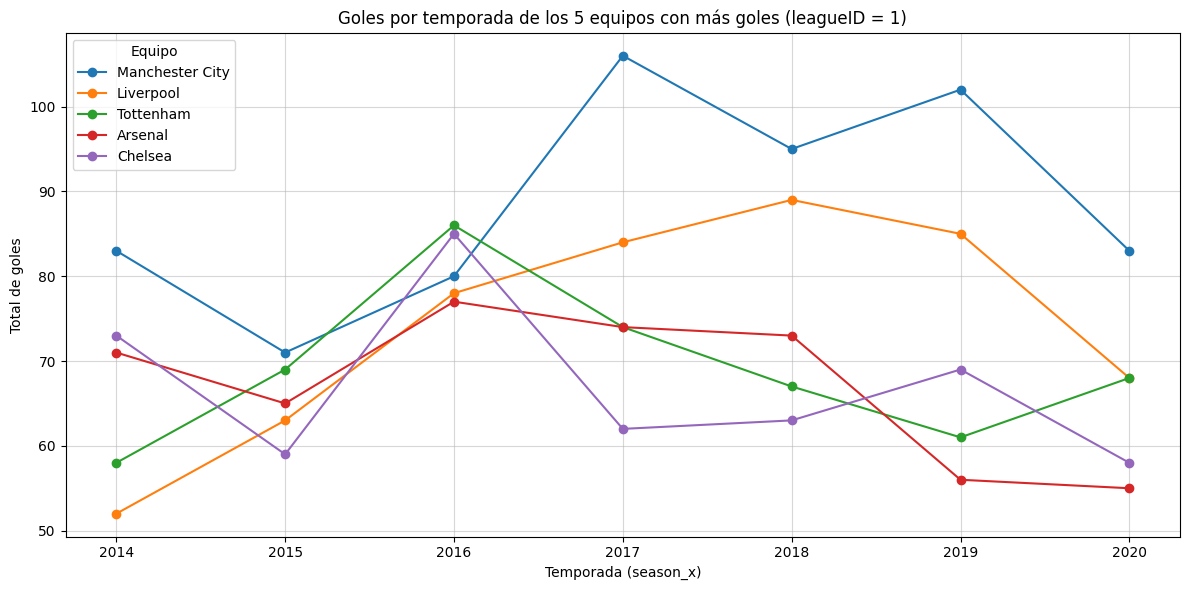

In [28]:
filtered_data = new_table[new_table['leagueID'] == 1]

# Calcular la suma de goles por equipo (name) y temporada
team_season_goals = (
    filtered_data.groupby(['name', 'season_x'])['goals']
    .sum()
    .reset_index()
)

# Identificar los 5 equipos con más goles en total
top_teams = (
    team_season_goals.groupby('name')['goals']
    .sum()
    .nlargest(5)
    .index
)

# Filtrar los datos para los 5 equipos principales
top_teams_data = team_season_goals[team_season_goals['name'].isin(top_teams)]

# Crear la serie temporal
plt.figure(figsize=(12, 6))

for team_name in top_teams:
    team_data = top_teams_data[top_teams_data['name'] == team_name]
    plt.plot(
        team_data['season_x'], 
        team_data['goals'], 
        marker='o', 
        label=f"{team_name}"
    )

# Configurar la gráfica
plt.title("Goles por temporada de los 5 equipos con más goles (leagueID = 1)")
plt.xlabel("Temporada (season_x)")
plt.ylabel("Total de goles")
plt.legend(title="Equipo")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_15388\2617456929.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_teams_stats))  # Colormap con tantos colores como equipos


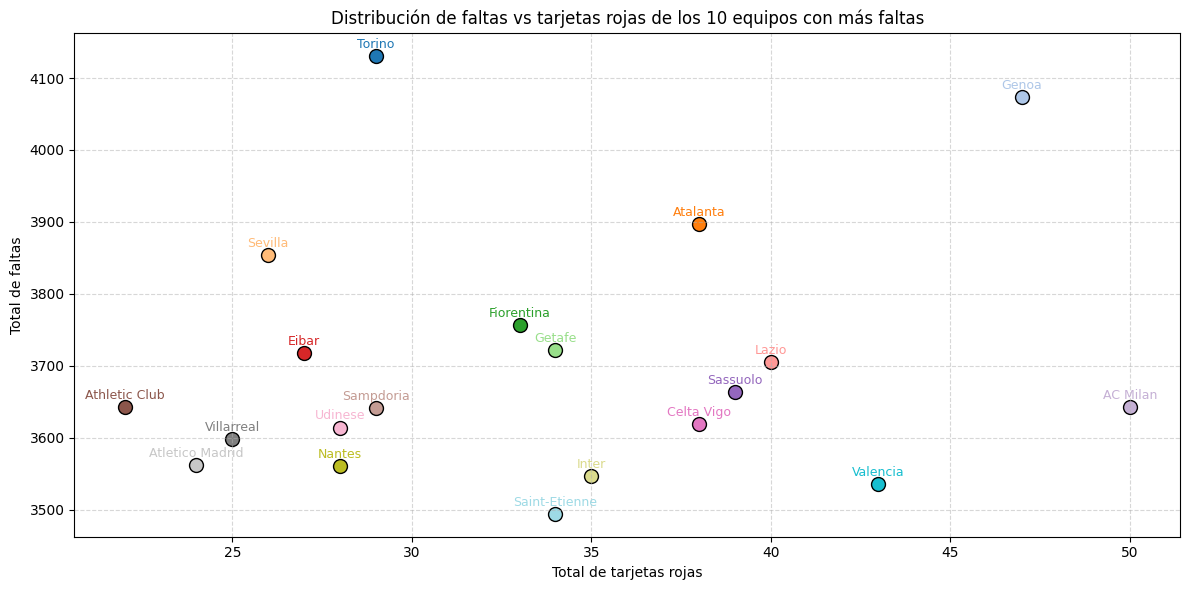

In [29]:
team_stats = (
    new_table.groupby('name').agg({'fouls': 'sum', 'redCards': 'sum'})
    .reset_index()
)

# Obtener los 10 equipos con más faltas
top_teams_stats = team_stats.nlargest(20, 'fouls')

# Generar colores únicos para los equipos
colors = plt.cm.get_cmap('tab20', len(top_teams_stats))  # Colormap con tantos colores como equipos
color_map = {name: colors(i) for i, name in enumerate(top_teams_stats['name'])}

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))
for team in top_teams_stats['name']:
    team_data = top_teams_stats[top_teams_stats['name'] == team]
    plt.scatter(
        team_data['redCards'], 
        team_data['fouls'], 
        color=color_map[team],
        edgecolors='black',  # Borde blanco para destacar puntos
        s=100  # Tamaño de los puntos
    )
    # Añadir texto con el nombre del equipo un poco más arriba del punto
    plt.text(
        team_data['redCards'].values[0],  # Coordenada x
        team_data['fouls'].values[0] + 7,  # Coordenada y con desplazamiento hacia arriba
        team,                              # Texto del equipo
        fontsize=9,                        # Tamaño de la fuente
        ha='center',                       # Alineación horizontal
        va='bottom',                       # Alineación vertical ajustada para que el texto esté arriba
        color=color_map[team]              # Color del texto igual al del punto
    )

# Configurar la gráfica
plt.xlabel('Total de tarjetas rojas')
plt.ylabel('Total de faltas')
plt.title('Distribución de faltas vs tarjetas rojas de los 10 equipos con más faltas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [30]:
import matplotlib.cm as cm

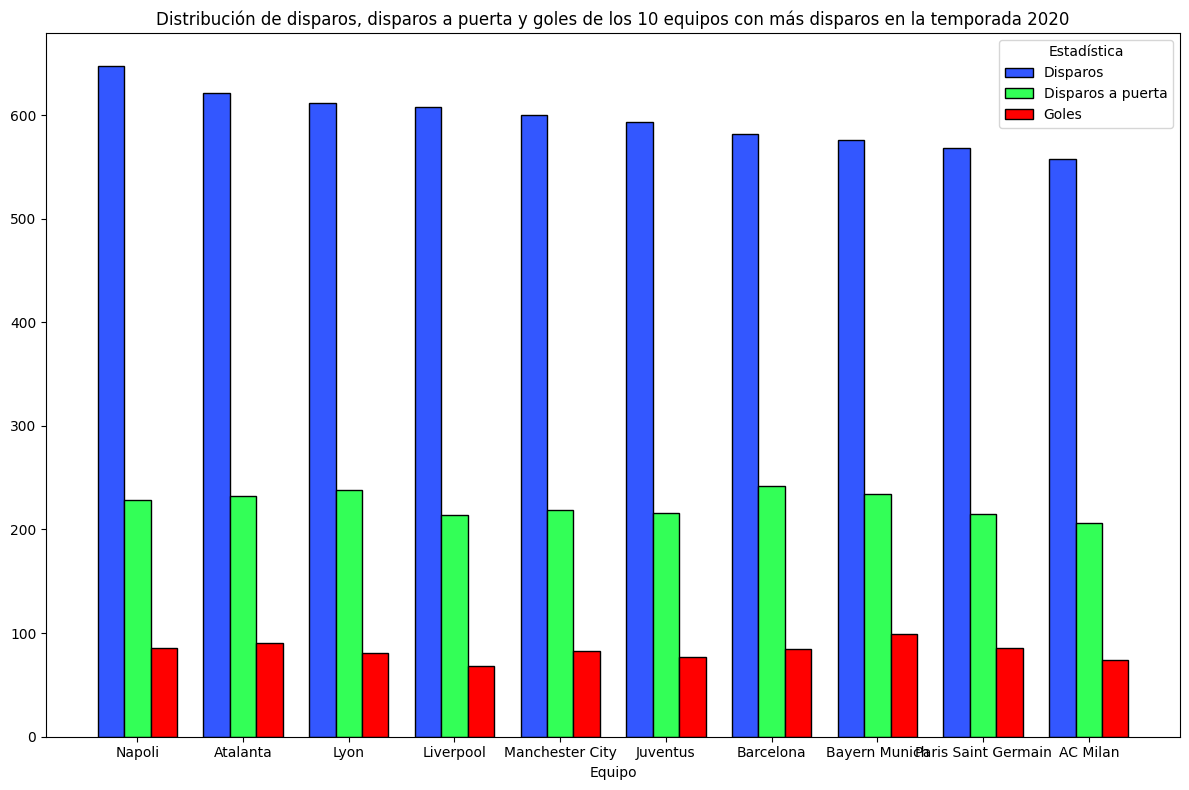

In [31]:
new_table_2020 = new_table[new_table['season_x'] == 2020]
team_stats_2020 = (
    new_table_2020.groupby('name').agg({'shots': 'sum', 'shotsOnTarget': 'sum', 'goals': 'sum'})
    .reset_index()
)

# Obtener los 10 equipos con más disparos en la temporada 2020
top_teams_stats_2020 = team_stats_2020.nlargest(10, 'shots')
colors = {
    'shots': '#3357FF',       # Azul
    'shotsOnTarget': '#33FF57', # Verde
    'goals': '#FF0000'         # Rojo
}

plt.figure(figsize=(12, 8))
bar_width = 0.25  # Ancho de cada barra

# Posición de las barras
index = range(len(top_teams_stats_2020))

# Agregar cada estadística como una barra separada con colores predefinidos
for i, stat in enumerate(['shots', 'shotsOnTarget', 'goals']):
    plt.bar([idx + i * bar_width for idx in index], top_teams_stats_2020[stat], bar_width,
            label=stat.capitalize(), color=colors[stat], edgecolor='black')

# Añadir etiquetas y leyenda
plt.xlabel('Equipo')
plt.ylabel('')
plt.title('Distribución de disparos, disparos a puerta y goles de los 10 equipos con más disparos en la temporada 2020')
plt.xticks([i + bar_width for i in index], top_teams_stats_2020['name'], ha='center')  # Sin rotación
plt.legend(title='Estadística', loc='upper right', labels=['Disparos', 'Disparos a puerta', 'Goles'])
plt.tight_layout()
plt.show()


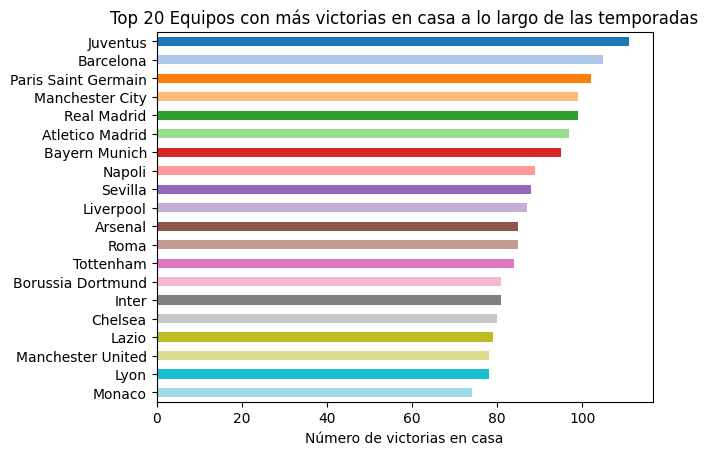

In [32]:
home_wins = new_table[(new_table['location'] == 'h') & (new_table['result'] == 'W')]

# Agrupamos por equipo y sumamos las victorias
home_wins_summary = (
    home_wins.groupby('name')
    .size()
    .sort_values(ascending=False)
    .head(20)
)


home_wins_summary.plot(kind='barh', color=plt.cm.tab20(range(20)))
plt.xlabel('Número de victorias en casa')
plt.ylabel('')
plt.title('Top 20 Equipos con más victorias en casa a lo largo de las temporadas')
plt.gca().invert_yaxis()  # Invertir el orden de las barras
plt.show()


In [33]:
new_table['season_x'].unique()

array([2015, 2016, 2014, 2017, 2018, 2019, 2020], dtype=int64)